## <Center>  DIAMOND PRICE PREDICTIONS

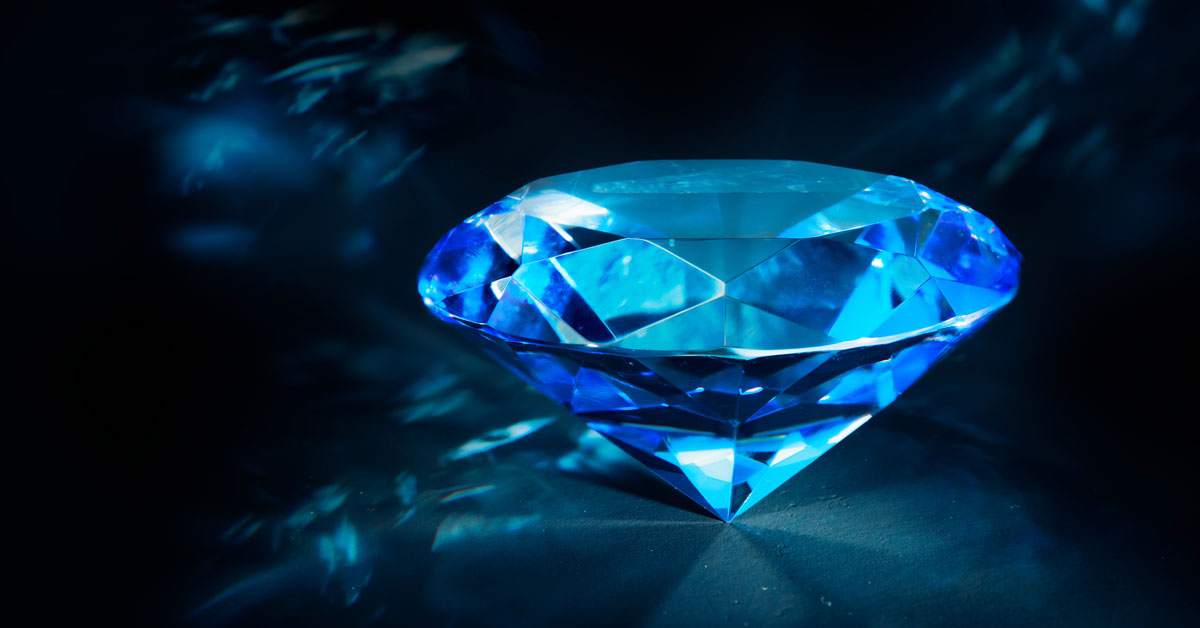

###  Diamond is a solid form of the element carbon with its atoms arranged in a crystal structure called diamond cubic. Another solid form of carbon known as graphite is the chemically stable form of carbon at room temperature and pressure, but diamond is metastable and converts to it at a negligible rate under those conditions. Diamond has the highest hardness and thermal conductivity of any natural material, properties that are used in major industrial applications such as cutting and polishing tools. They are also the reason that diamond anvil cells can subject materials to pressures found deep in the Earth.Because the arrangement of atoms in diamond is extremely rigid, few types of impurity can contaminate it (two exceptions are boron and nitrogen). Small numbers of defects or impurities (about one per million of lattice atoms) color diamond blue (boron), yellow (nitrogen), brown (defects), green (radiation exposure), purple, pink, orange, or red. Diamond also has a very high refractive index and a relatively high optical dispersion.

## The table consists of several columns with the following meanings: 
#### carat: the weight of the cubic zirconia in carats (a unit of mass used for gemstones)
#### cut: the quality of the cut of the gemstone (e.g., Fair, Good, Very Good, Premium, Ideal)
#### color: the color of the gemstone (ranging from D, which is colorless, to Z, which has a yellowish hue)
#### clarity: the clarity of the gemstone, or the absence of inclusions and blemishes (ranging from I1, which has visible inclusions, to IF, which is internally flawless)
#### depth: the height of the gemstone measured from the culet (bottom) to the table (top), divided by its diameter
#### table: the width of the table, or the flat facet on the top of the gemstone, expressed as a percentage of the diameter
#### x, y, z: the length, width, and depth of the gemstone in millimeters
#### price: the price of the gemstone in US dollars.

### IMPORTING LIBRARIES

In [1]:
#Basic Analysis & Visualisation libaries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import klib as k
import seaborn as sns
import matplotlib.pyplot as plt

#Data Preprocessing & Splitig libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score


#Machine Learning Model evaluation libraries
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

#Machine Learning Alogorithms libararies
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso,LinearRegression,LogisticRegression,Ridge

In [2]:
#Load the dataset
data=pd.read_csv("cubic_zirconia.csv")

In [3]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
#Checking dataset informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
# the column unnamed:0 not needed in dataset so dropping the column 
data.drop(columns="Unnamed: 0",inplace=True)

In [6]:
# the column cut,clarity,color contain unwanted values so replace them 
data['cut'] = data['cut'].str.replace('^b','')

In [7]:
data['clarity'] = data['clarity'].str.replace('^b','')
data['color'] = data['color'].str.replace('^b','')

In [8]:
# creating new datasets removing the unwanted 
data.head(10)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [9]:
#Checking dataset column and row numbers
data.shape

(26967, 10)

In [10]:
# checking the null values
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [11]:
# cecking the duplicated values
data.duplicated().sum()

34

In [12]:
# droping the duplicated values
data.drop_duplicates(inplace=True)

In [13]:
#Checking statistical analysis of numerical values 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00


### DATA VISUALIZATION METHODS 

#### PIE PLOTS 

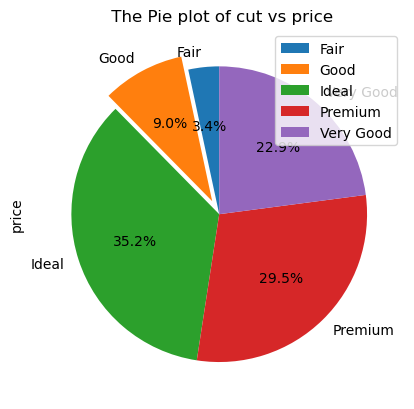

In [14]:
# THE PIE PLOTS OF CUT,COLOR,CLARITY VS PRICE FROM DATASETS
cut_price = data.groupby(['cut'])['price'].sum()
cut_price.plot.pie(title=' The Pie plot of cut vs price',
                   autopct='%1.1f%%', startangle=90, explode=[0, 0.1, 0, 0, 0], legend=True);

# observation ::: The ideal and premium cut have the highest percentage of diamond available and lowest percentage cut is fair.


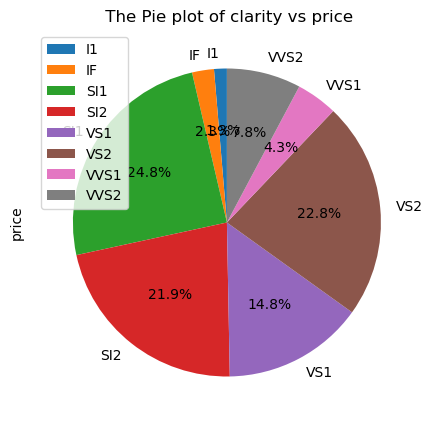

In [15]:
clarity_price = data.groupby(['clarity'])['price'].sum()
clarity_price.plot.pie(title=' The Pie plot of clarity vs price',
                   autopct='%1.1f%%', startangle=90,legend=True,figsize=(5,5));

# observation ::: The good quality diamomd (if and fl) available in small amout and the slightly included (SI 1, SI 2,VS 1,VS2) 
#available in most.so , the flawless one  will be highest amount of price.

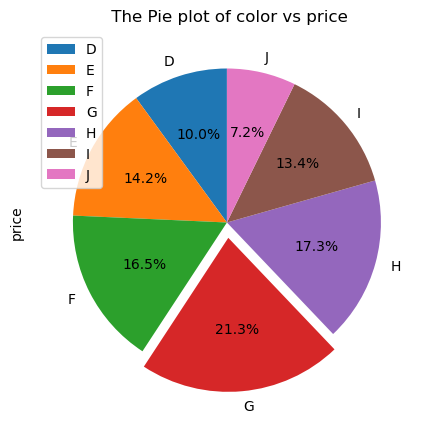

In [16]:
cut_price = data.groupby(['color'])['price'].sum()
cut_price.plot.pie(title=' The Pie plot of color vs price',
                   autopct='%1.1f%%', startangle=90,legend=True,explode=[0, 0, 0, 0.1,0,0,0],figsize=(5,5));

# OBSERVATION : The most available daimond color is G and low available is J.

## BARPLOT 

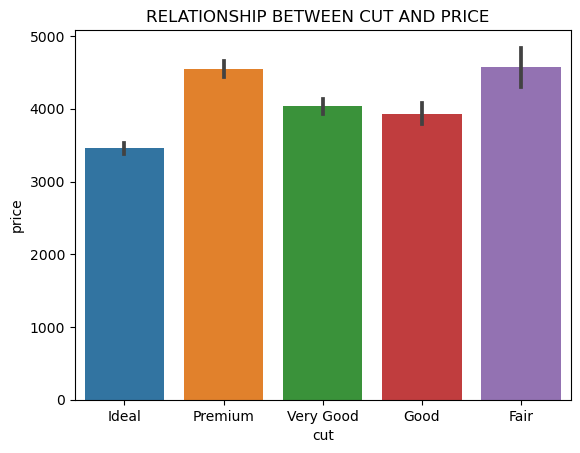

In [17]:
plt.title('RELATIONSHIP BETWEEN CUT AND PRICE  ')
sns.barplot(x='cut', y='price', data=data);

# OBSERVATION ::: Despite low quality cut the average price for Fair cut zirconia is highest.

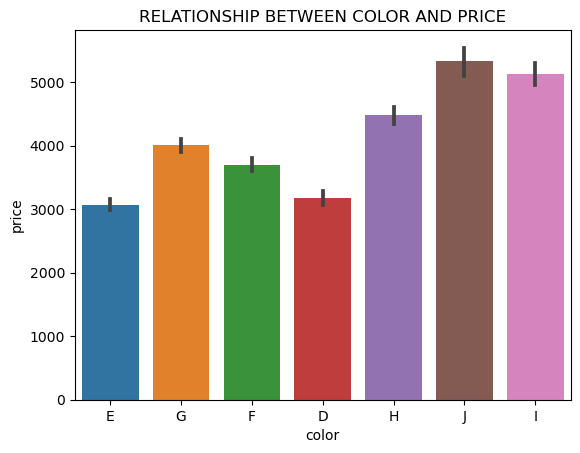

In [18]:
plt.title('RELATIONSHIP BETWEEN COLOR AND PRICE')
sns.barplot(x='color', y='price', data=data);

# OBSEVATION ::: It is surprising that the colorless zirconia ('D', 'E', 'F' are cheaper than the near colorless ones ('g', 'h', 'i', 'j')

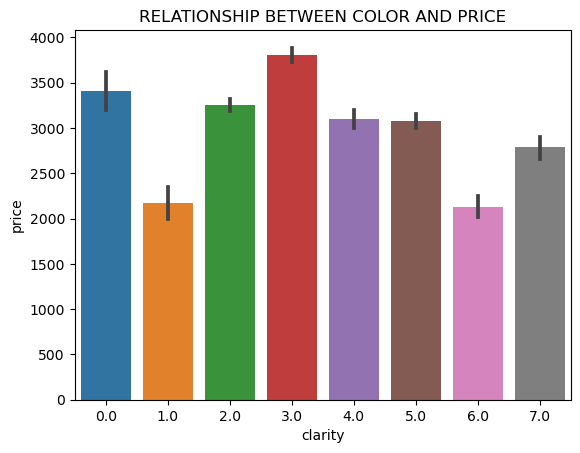

In [48]:
plt.title('RELATIONSHIP BETWEEN CLARITY AND PRICE')
sns.barplot(x='clarity', y='price', data=data);

## OBSERVATION ::: Zirconia with SI2 (low clarity) has highest average price.

#### dist plot

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


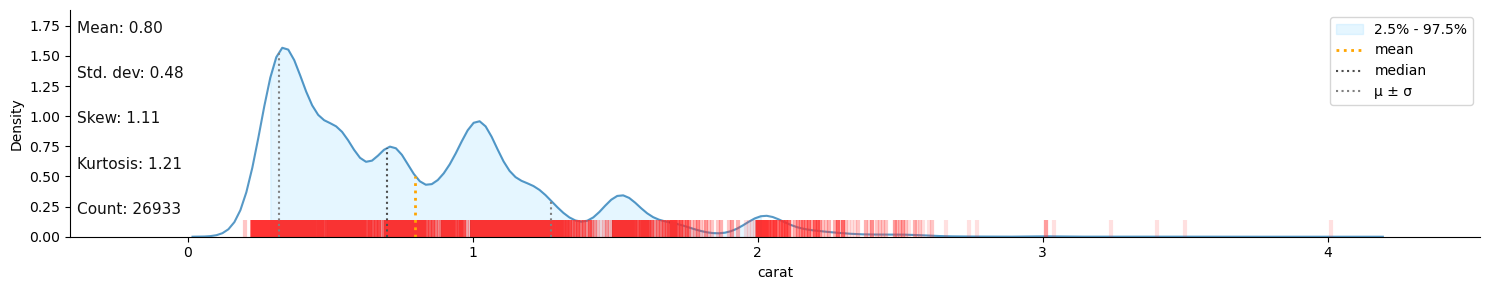

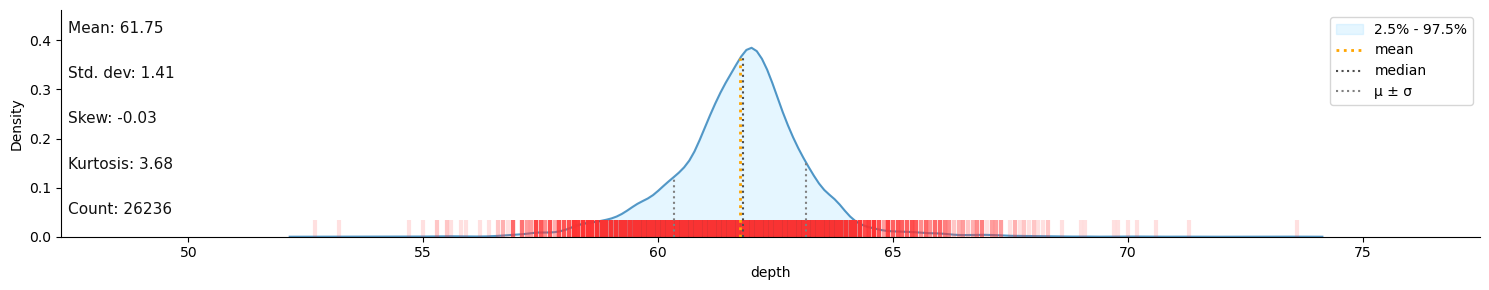

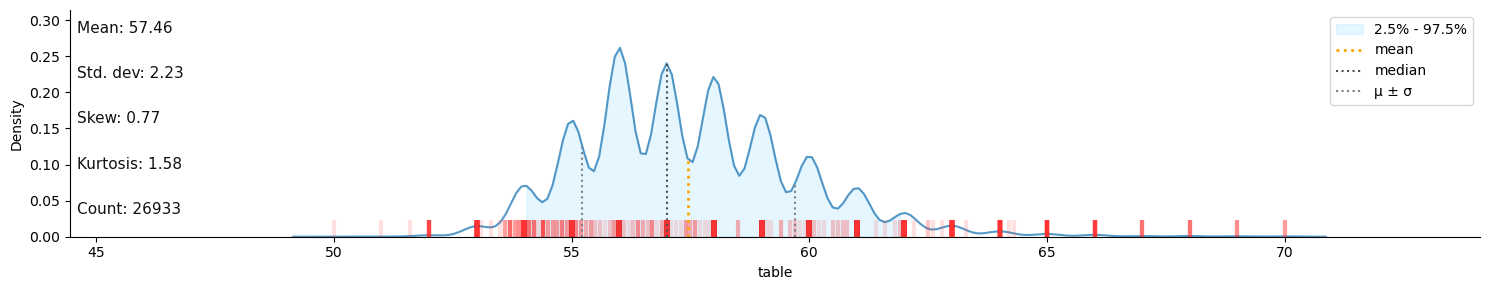

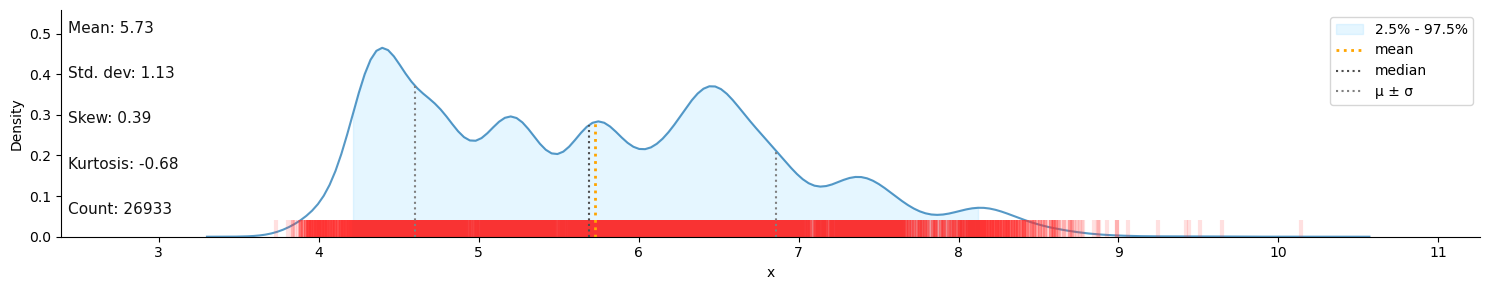

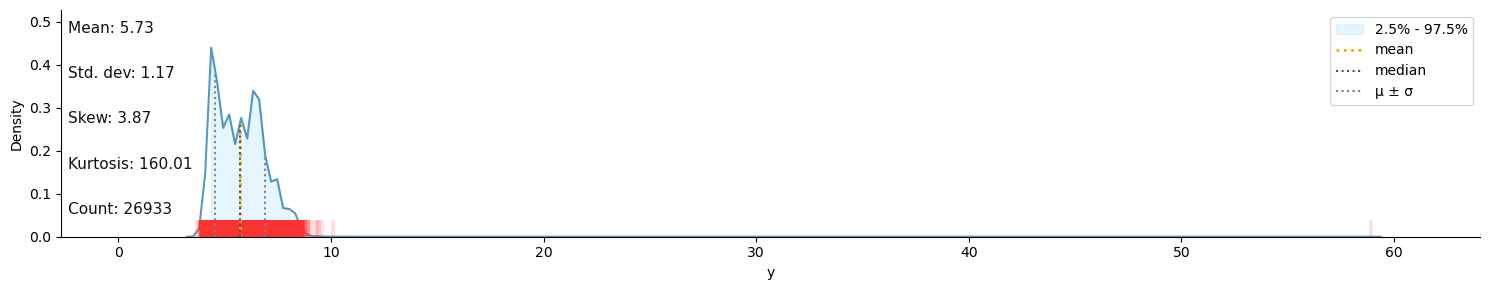

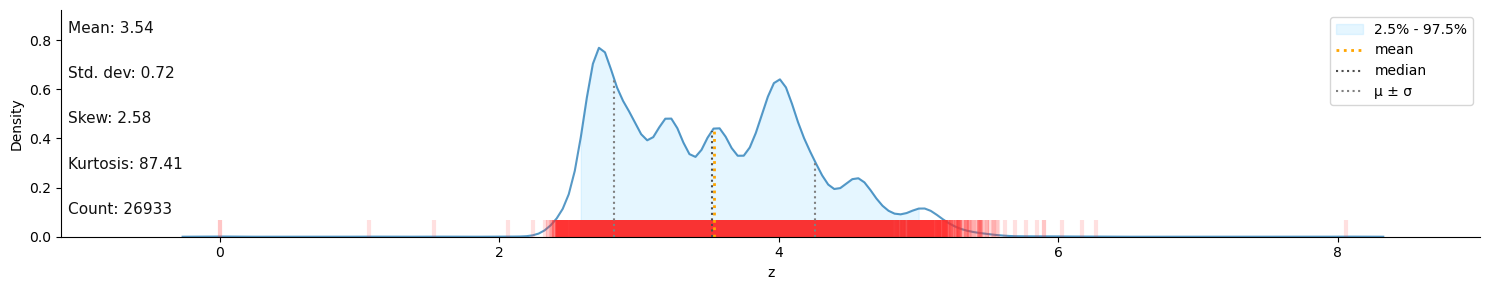

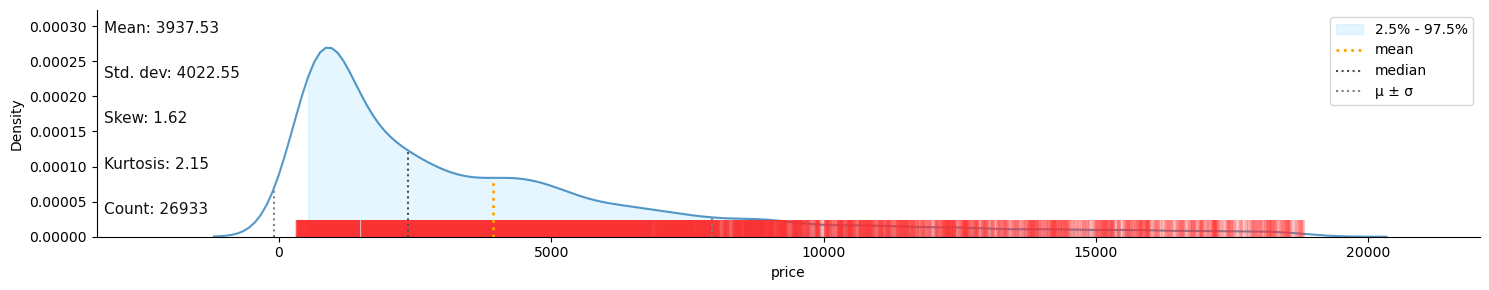

In [19]:
k.dist_plot(data);

In [20]:
data.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

### CHANGING THE CATAGORICAL DATA TO NUMERICAL


In [21]:
le=LabelEncoder()

In [22]:
# FROM THE DATASET THE CUT ,COLOR , CLARITY HAVE CATAGORICAL VALUES SO WE HAVE TO CHANGE THEM INTO NUMERICAL 
data["cut"]=le.fit_transform(data.cut)

In [23]:
data["color"]=le.fit_transform(data.color)
data["clarity"]=le.fit_transform(data.clarity)

In [24]:
# After changing catagorical to numerical check the fresh dataset
data

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...
26962,1.11,3,3,2,62.3,58.0,6.61,6.52,4.09,5408
26963,0.33,2,4,1,61.9,55.0,4.44,4.42,2.74,1114
26964,0.51,3,1,5,61.7,58.0,5.12,5.15,3.17,1656
26965,0.27,4,2,7,61.8,56.0,4.19,4.20,2.60,682


## KDE PLOT

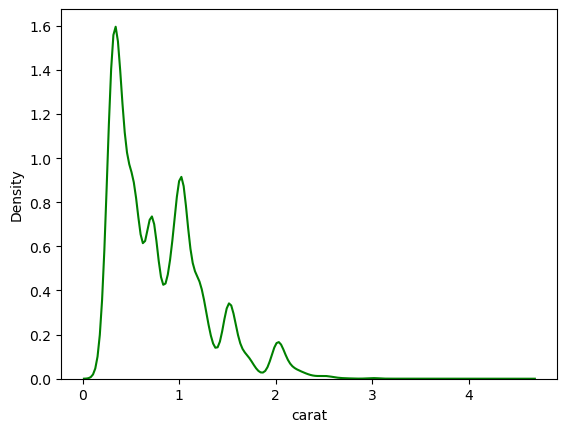

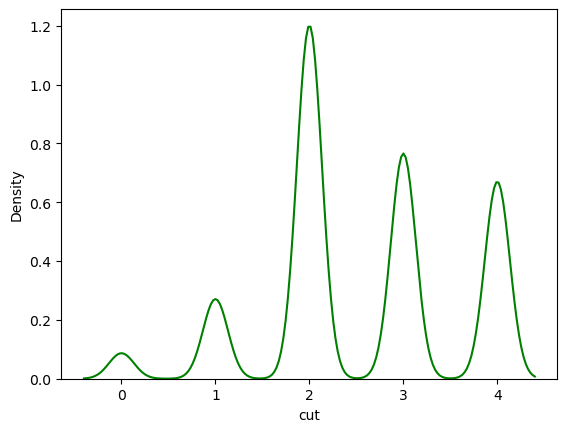

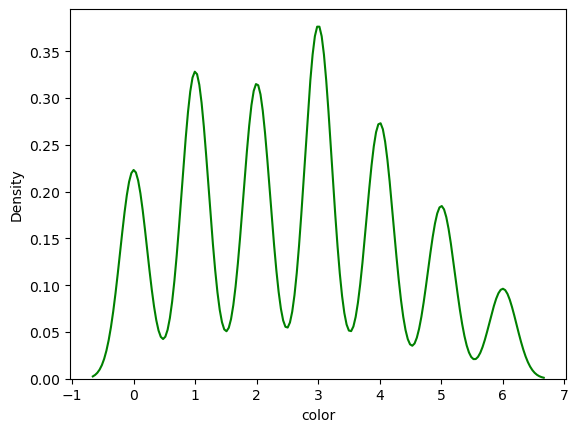

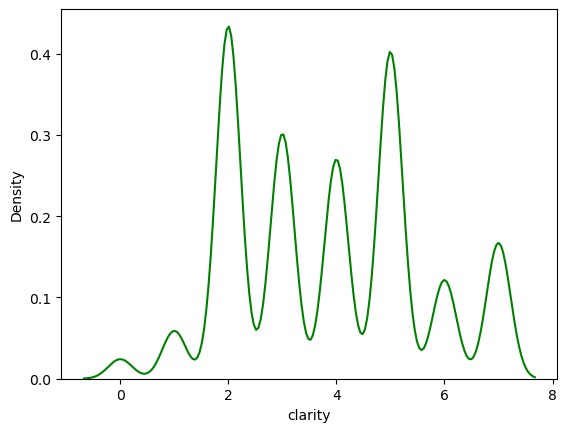

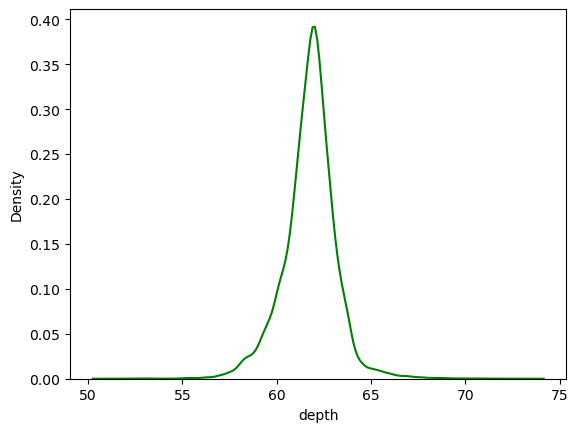

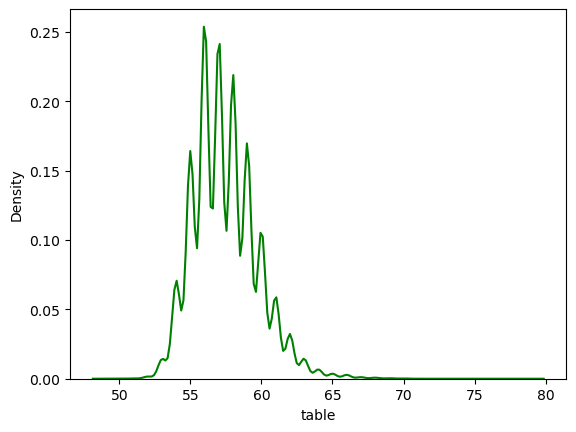

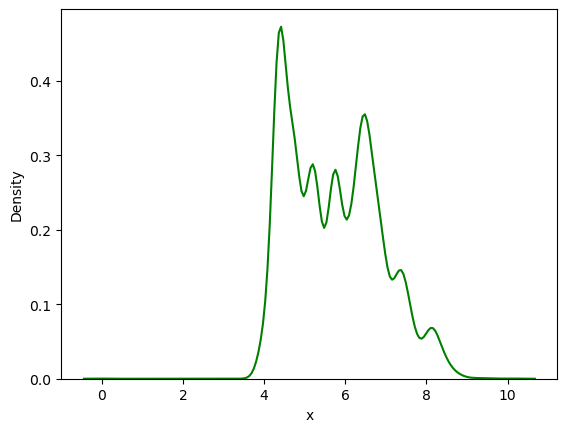

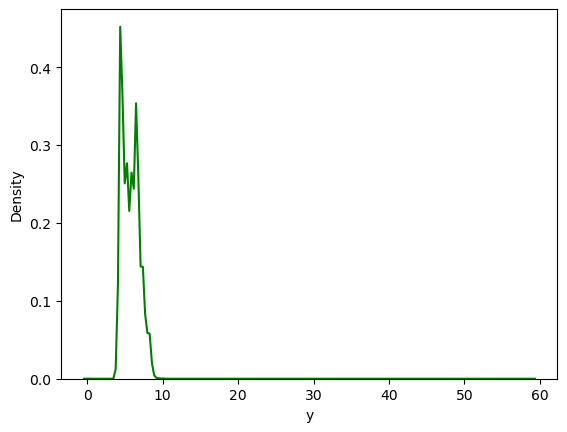

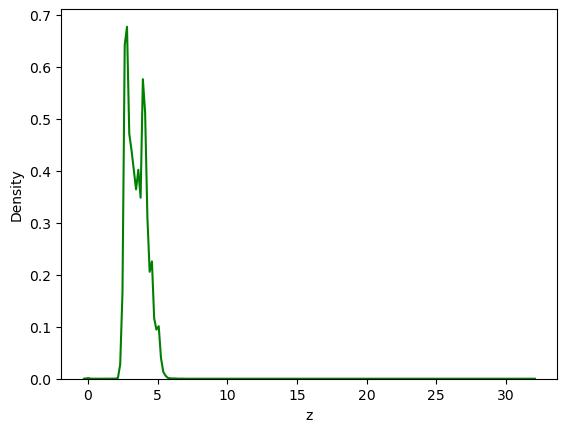

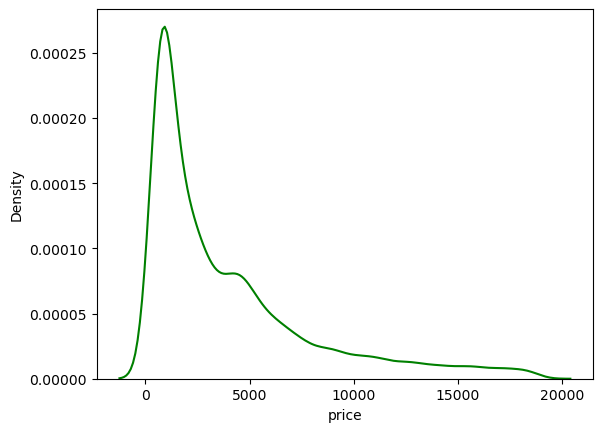

In [25]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.kdeplot(x=data[i],color="GREEN")
        plt.show();

### HISTPLOT

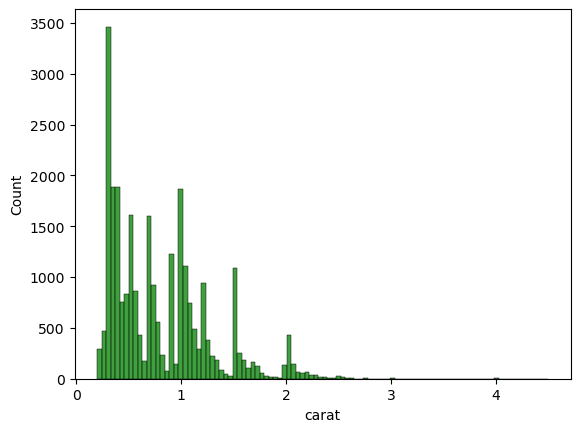

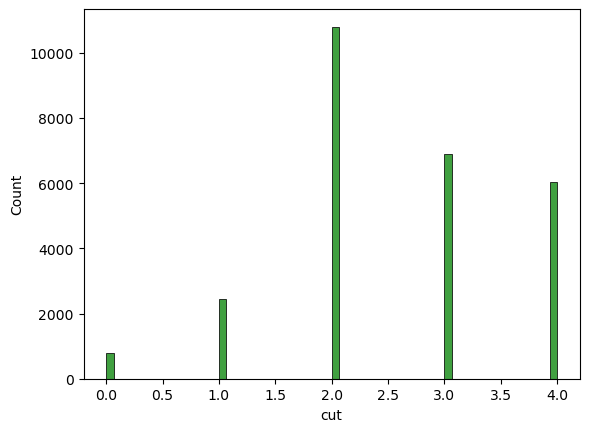

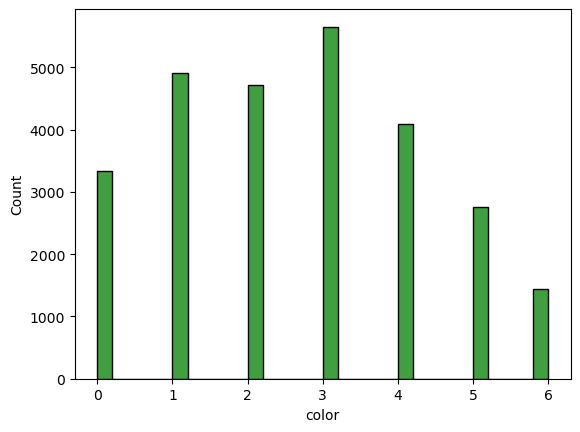

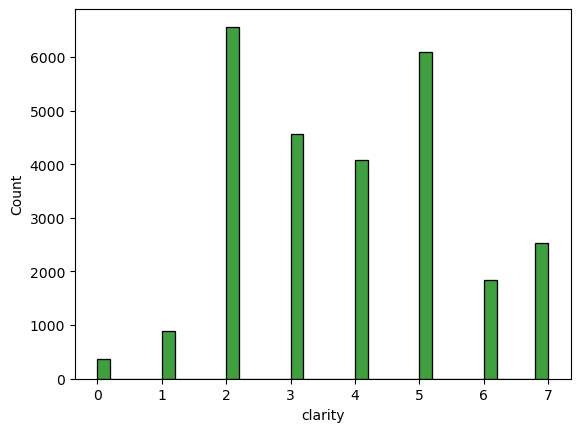

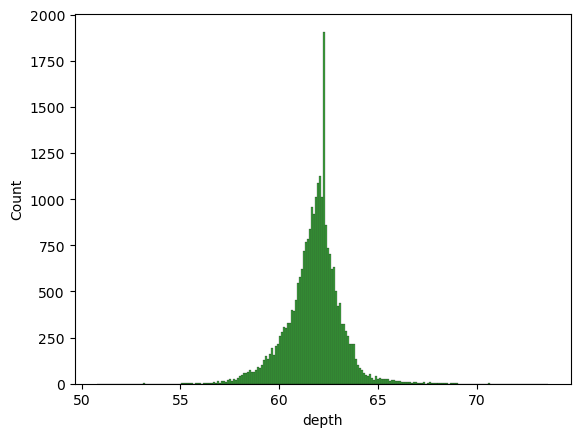

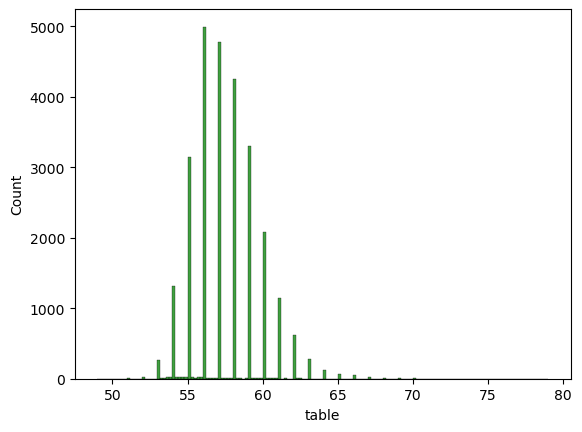

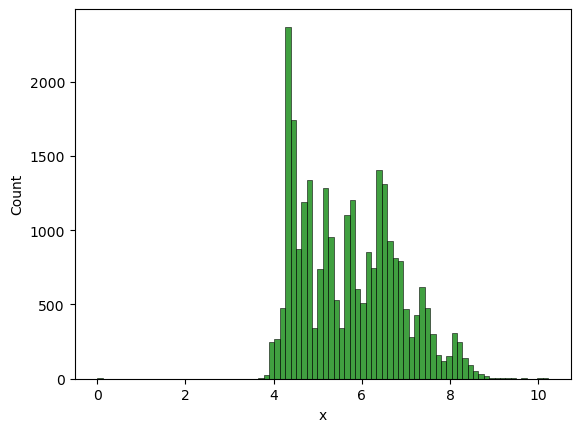

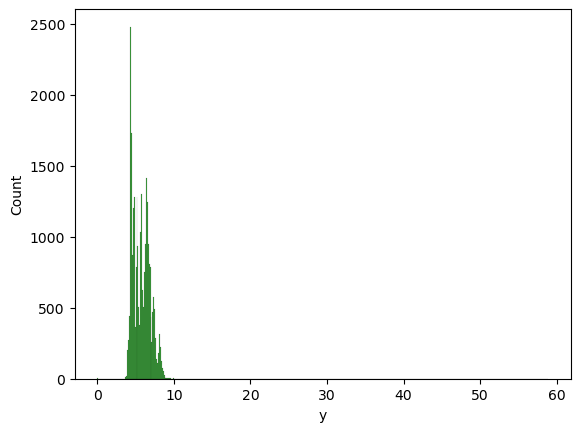

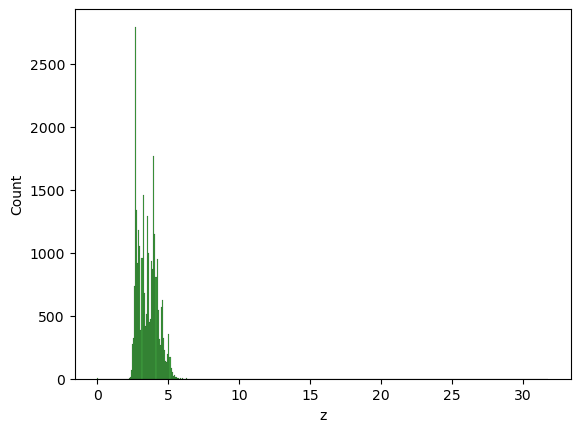

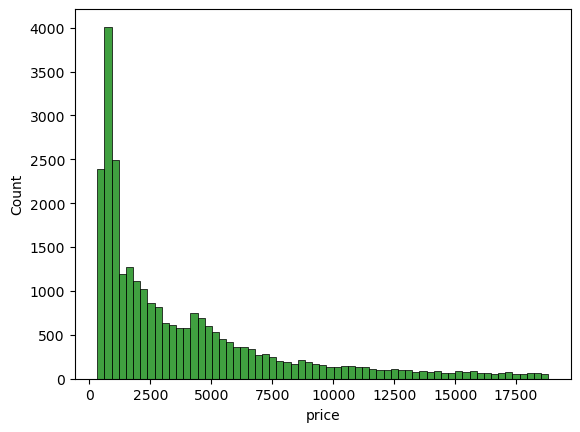

In [26]:
for i in data.columns:
    if data[i].dtype != "object":
        sns.histplot(x=data[i],color="GREEN")
        plt.show();

### BOXLOT

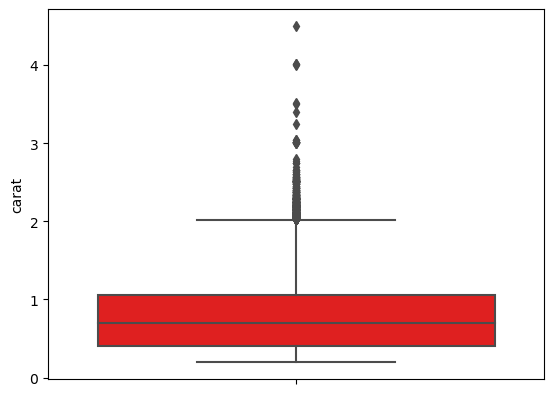

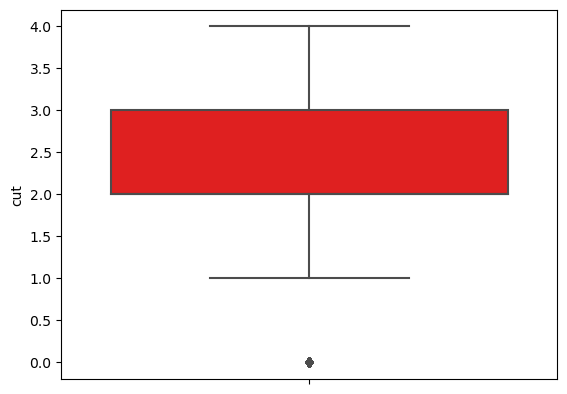

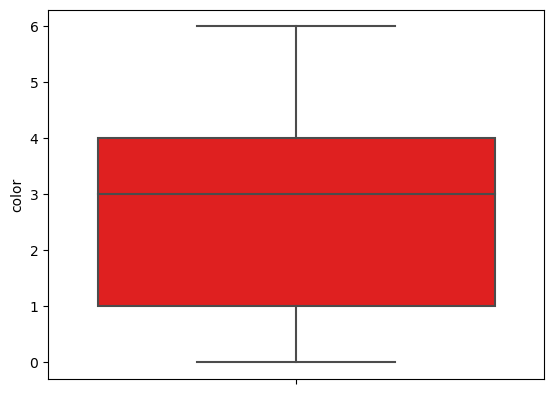

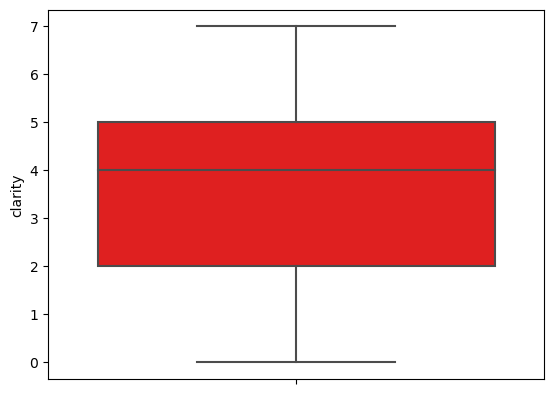

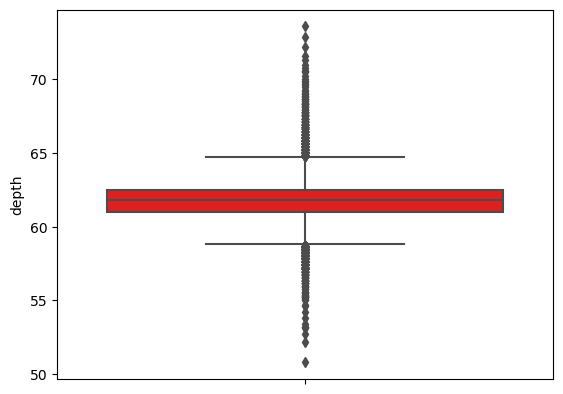

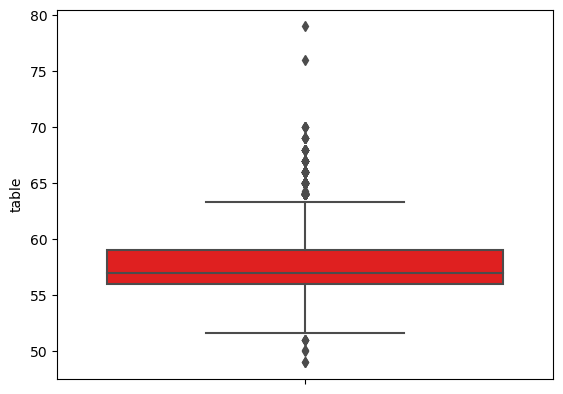

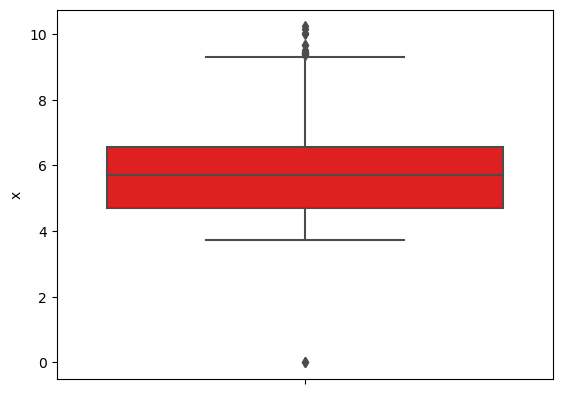

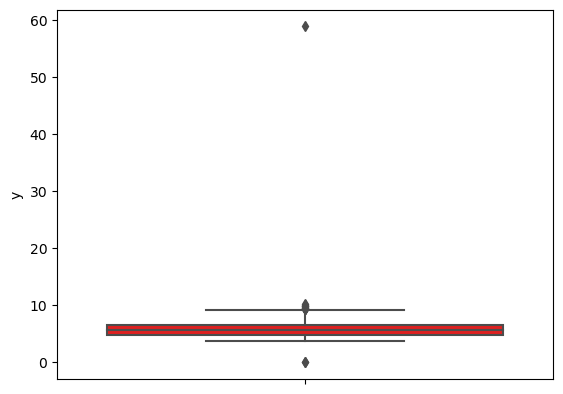

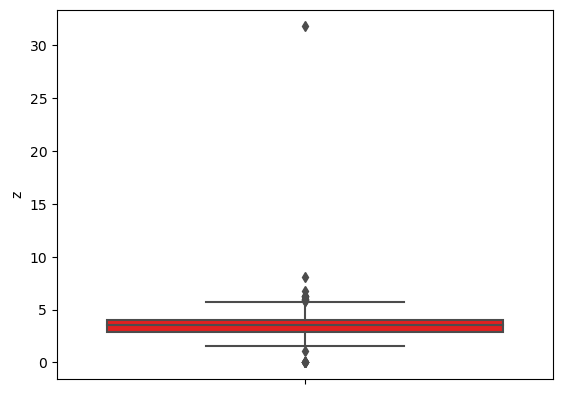

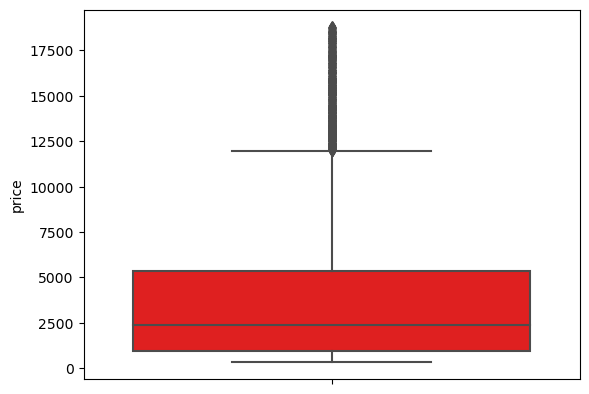

In [27]:
for i in data.columns:
    if data[i].dtype!="object":
            sns.boxplot(y=data[i],color="red")
            plt.show()

#### THE BOXPLOT CONTAIN OUTLIER SO WE HAVE TO REMOVE IT

In [28]:
# OUTLIER REMOVING PROCESS
def outlier(col):
    Q3, Q1= np.nanpercentile(col,[75,25])
    iqr=Q3-Q1
    ul=Q3+1.5*iqr
    ll=Q1-1.5*iqr
    return ul, ll

In [29]:
for column in data.columns:
    if data[column].dtype !="object":
        ul,ll=outlier(data[column])
        data[column]=np.where((data[column]>ul)|(data[column]<ll),np.nan,data[column])

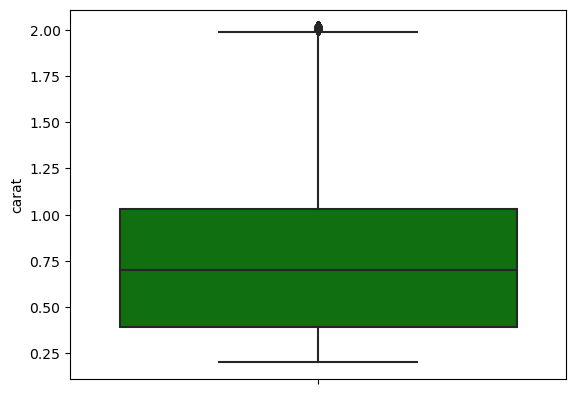

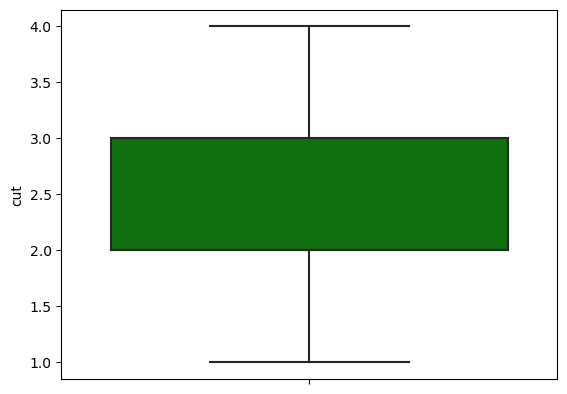

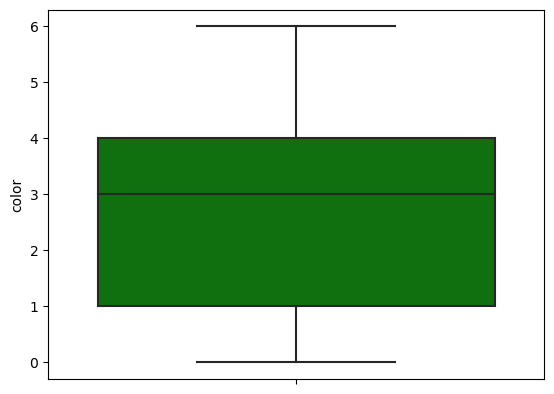

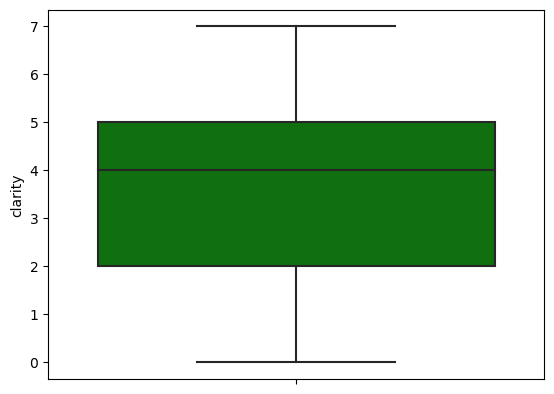

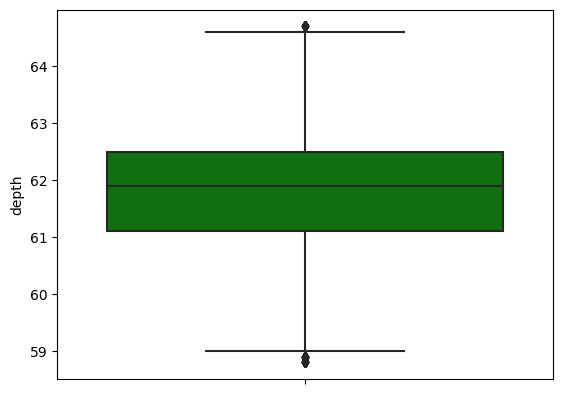

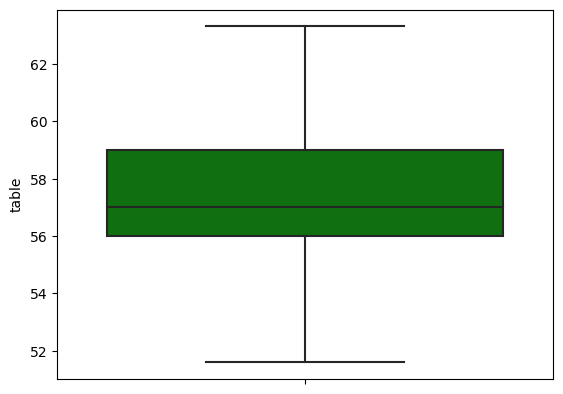

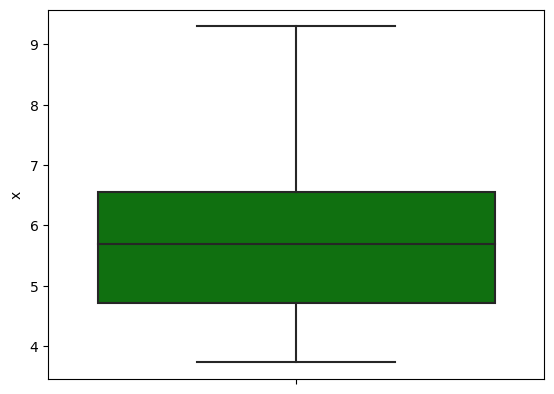

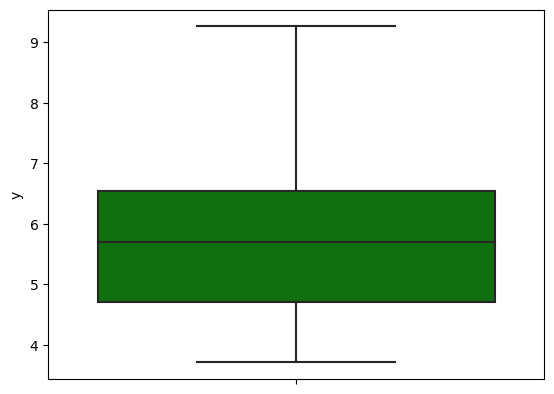

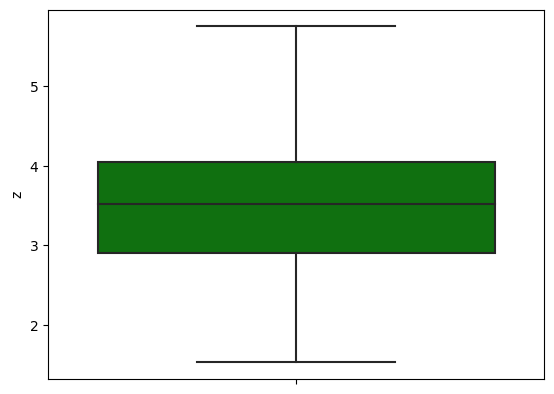

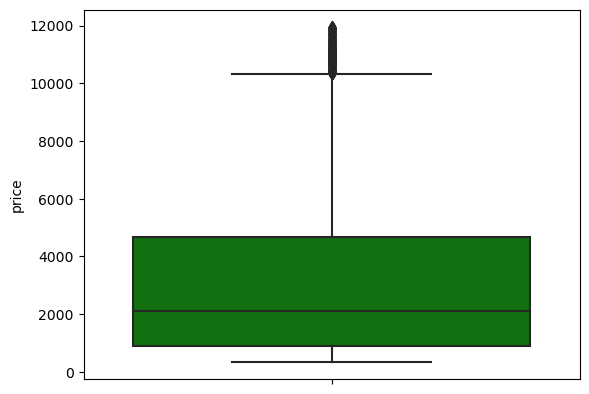

In [30]:
# AFTER REMOVING THE OUTLIER THE FINAL BOXPLOT
for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(y=data[i],color="green")
        plt.show()

In [31]:
data.dropna(inplace=True)

 ## CHECKING THE CORRELATION WITH TARGET " PRICE "

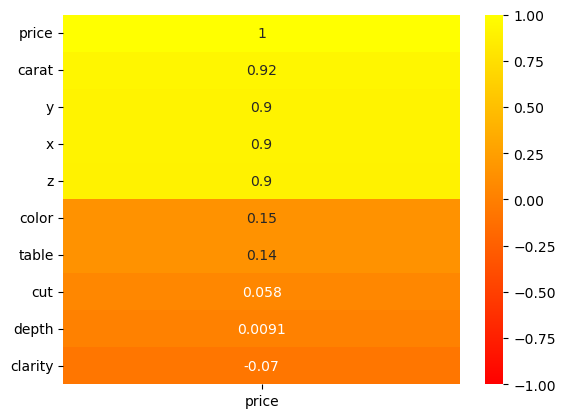

In [32]:
sns.heatmap(data.corr()[['price']].sort_values(by='price',ascending=False),vmin=-1,vmax=1,annot=True,cmap='autumn');

 ## LETS TAKE ONLY THE COLUMNS WITH GOOD CORRELATION ONLY

In [33]:
# TAKING THE GOOD CORRELATIONS ARE X 
x=data[["carat","cut","color","depth","table","x","y","z"]].values

In [34]:
# TAKING THE RESULT HAS Y 
y=data[["price"]].values

### FEATURE SCALING

In [35]:
sc=StandardScaler()

In [36]:
x=sc.fit_transform(x)

## MODEL BUILDING

In [37]:
# BUILD THE BEST MODEL FOR ANALYSING
models = {
    "LinearRegression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [38]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)



cross validation model : LinearRegression
AVERAGE RMSE:  996.5699097387227
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  997.0696225003958
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  996.5416665838029
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  1205.9403000102507
****************************************************************************************************
cross validation model : RandomForestRegressor
AVERAGE RMSE:  874.6124934192001
****************************************************************************************************


## MODEL TRAINING 

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
# FROM MODEL BUILDING SELECT THE BEST MODEL 
model=RandomForestRegressor()

In [41]:
model.fit(x_train,y_train)

RandomForestRegressor()

 ## PRICE PREDICTION

In [42]:
y_pred = model.predict(x)

In [43]:
op=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)

## SCATTER PLOT

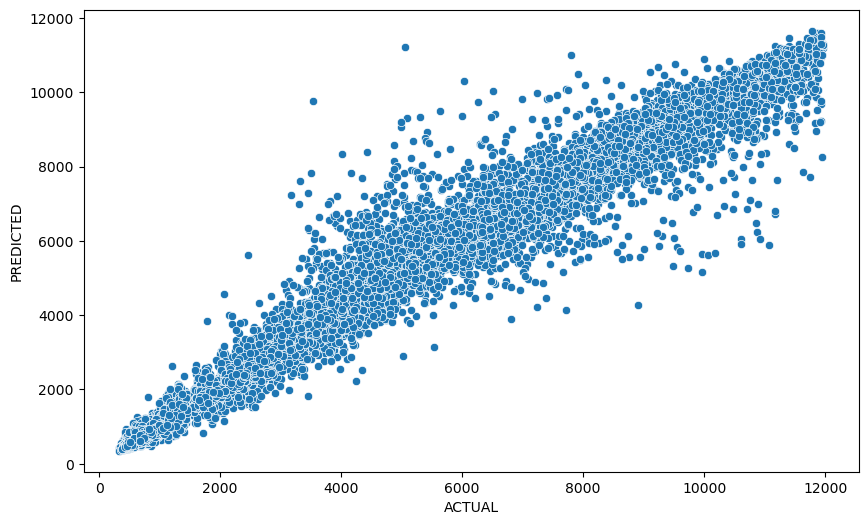

In [44]:
plt.figure(figsize=(10,6))
plt.xticks()
sns.scatterplot(data=op,x='ACTUAL',y="PREDICTED")
plt.show();

## LINE PLOT

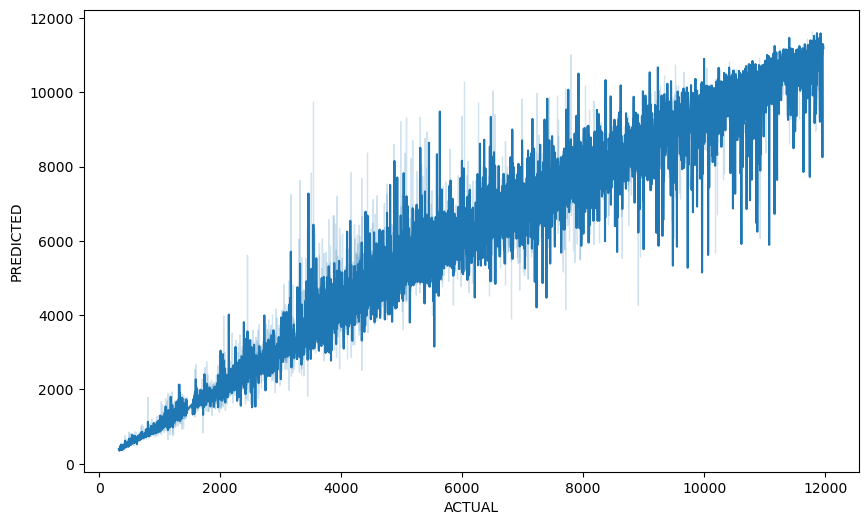

In [45]:
plt.figure(figsize=(10,6))
plt.xticks()
sns.lineplot(data=op,x='ACTUAL',y="PREDICTED")
plt.show();